In [1]:
import neat
import numpy as np
import graphviz.backend as backend
import graphviz

In [2]:
import os

# Add Graphviz path dynamically
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

# Verify if Python can now access dot
os.system("dot -V")


0

In [3]:
# XOR inputs and outputs
xor_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
xor_outputs = [0, 1, 1, 0]


In [41]:
import graphviz

def draw_net(config, genome, filename, node_names=None):
    """Visualize the network using graphviz."""
    dot = graphviz.Digraph(format="png")
    if node_names is None:
        node_names = {}

    # Add input and output nodes
    for i in range(-config.genome_config.num_inputs, 0):
        node_names[i] = f"Input {abs(i)}"
    for o in range(config.genome_config.num_outputs):
        node_names[o] = f"Output {o}"

    # Add all nodes
    for node in genome.nodes:
        label = node_names.get(node, str(node))
        shape = "ellipse" if node >= 0 else "box"  # Output nodes = ellipse, input = box
        dot.node(str(node), label, shape=shape)

    # Add all connections
    for (src, dest), conn in genome.connections.items():
        if conn.enabled:  # Only draw enabled connections
            weight = f"{conn.weight:.2f}"
            dot.edge(str(src), str(dest), label=weight)

    # Save the graph
    dot.render(filename, cleanup=True)
    print(f"Network saved as {filename}.png")


In [42]:
def save_best_network(genome, config, generation):
    filename = f"genome_pics/best_genome_gen_{generation}"
    draw_net(config, genome, filename)  # Call the custom visualization function


In [43]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        # Create a neural network from the genome
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # Calculate fitness
        fitness = 4.0  # Start with max fitness
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)  # Get the network's prediction
            fitness -= (output[0] - xo) ** 2  # Penalize error (squared error)
        
        # Assign fitness to the genome
        genome.fitness = fitness


In [44]:
config_path = "config-feedforward.txt"  # Replace with your file's path
config = neat.Config(neat.DefaultGenome, 
                     neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, 
                     neat.DefaultStagnation, 
                     config_path)


population = neat.Population(config)
stats = neat.StatisticsReporter()
population.add_reporter(stats)
population.add_reporter(neat.StdOutReporter(True))

In [45]:
for generation in range(150):  # Replace 150 with the desired number of generations
    # Run one generation at a time
    population.run(eval_genomes, 1)

    # Track the best genome in the current generation
    best_genome = None
    highest_fitness = -float('inf')  # Reset for each generation

    for genome_id, genome in population.population.items():
        if genome.fitness is not None and genome.fitness > highest_fitness:
            highest_fitness = genome.fitness
            best_genome = genome

    # Save the best genome visualization for the current generation
    if best_genome is not None:  # Ensure a valid genome exists
        save_best_network(best_genome, config, generation)



 ****** Running generation 0 ****** 

Population's average fitness: 2.21071 stdev: 0.34815
Best fitness: 2.99689 - size: (1, 2) - species 1 - id 53
Average adjusted fitness: 0.531
Mean genetic distance 1.041, standard deviation 0.405
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.531     0
Total extinctions: 0
Generation time: 0.006 sec
Network saved as genome_pics/best_genome_gen_0.png

 ****** Running generation 1 ****** 

Population's average fitness: 2.31758 stdev: 0.30625
Best fitness: 2.99689 - size: (1, 2) - species 1 - id 53
Average adjusted fitness: 0.533
Mean genetic distance 1.177, standard deviation 0.402
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.533     1
Total extinctions: 0
Generation time: 0.013 sec (0.010 average)
Network saved as genome_pics/best_g

In [21]:
winner = population.run(eval_genomes, 150)  # Run for up to 100 generations
print('\nBest genome:\n{!s}'.format(winner))



 ****** Running generation 0 ****** 

Population's average fitness: 2.22231 stdev: 0.33669
Best fitness: 2.99971 - size: (1, 2) - species 2 - id 144
Average adjusted fitness: 0.543
Mean genetic distance 1.687, standard deviation 0.541
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    55      2.9    0.508     0
     2    0    95      3.0    0.578     0
Total extinctions: 0
Generation time: 0.008 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.33274 stdev: 0.30285
Best fitness: 2.99971 - size: (1, 2) - species 2 - id 144
Average adjusted fitness: 0.334
Mean genetic distance 1.438, standard deviation 0.498
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    74      2.9    0.283     1
     2    1    76      3.0    0.385     1
Total extinctions: 0
Generation time: 0.003 sec (0.005 average)


In [50]:
# Create the best network
best_net = neat.nn.FeedForwardNetwork.create(winner, config)

# Test on XOR inputs
for xi, xo in zip(xor_inputs, xor_outputs):
    prediction = best_net.activate(xi)
    print(f"Input: {xi}, Predicted: {prediction[0]:.4f}, Expected: {xo}")


Input: (0, 0), Predicted: 0.4750, Expected: 0
Input: (0, 1), Predicted: 0.4750, Expected: 1
Input: (1, 0), Predicted: 1.0000, Expected: 1
Input: (1, 1), Predicted: 0.2964, Expected: 0


In [51]:
def draw_net(config, genome, filename='network'):
    dot = graphviz.Digraph(format='png')
    
    # Add input nodes
    for i in range(-config.genome_config.num_inputs, 0):
        dot.node(str(i), f"Input {abs(i)}", shape='circle')

    # Add output nodes
    for o in range(config.genome_config.num_outputs):
        dot.node(str(o), f"Output {o}", shape='circle')

    # Add hidden nodes
    for node in genome.nodes.keys():
        if node >= 0:  # Hidden nodes have non-negative indices
            dot.node(str(node), f"Node {node}", shape='circle')

    # Add edges with weights
    for (src, dest), conn in genome.connections.items():
        if conn.enabled:
            dot.edge(str(src), str(dest), label=f"{conn.weight:.2f}")

    # Render the network
    dot.render(filename, cleanup=True)
    print(f"Network visualization saved as {filename}.png")


In [54]:
draw_net(config, winner, filename='best_genome')


Network visualization saved as best_genome.png


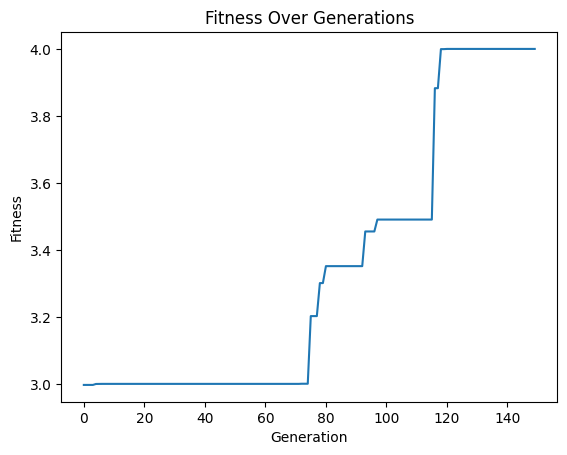

In [53]:
import matplotlib.pyplot as plt

generations = range(len(stats.most_fit_genomes))
fitness_scores = [genome.fitness for genome in stats.most_fit_genomes]

plt.plot(generations, fitness_scores)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations")
plt.show()


In [28]:
import graphviz

# Function to save a network visualization
def save_best_network(genome, config, generation):
    filename = f"best_genome_gen_{generation}"
    dot = graphviz.Digraph(format='png')
    node_names = {0: "Output"}  # Customize node names if needed
    for i in range(-config.genome_config.num_inputs, 0):
        node_names[i] = f"Input {abs(i)}"
    dot = neat.visualize.draw_net(config, genome, True, node_names=node_names)
    dot.render(filename, cleanup=True)
    print(f"Saved best network for generation {generation} as {filename}.png")


In [12]:
import os
from moviepy.video.io import ImageSequenceClip

# Path to the folder containing genome images
image_folder = "genome_pics"
output_video = "genome_evolution.mp4"
fps = 5  # Frames per second

def generate_video(image_folder, output_video, fps=5):
    # Get all PNG files from the folder, sorted by filename
    image_files = sorted(
        [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".png")]
    )

    if not image_files:
        print("No images found in the folder. Please ensure the folder contains .png files.")
        return

    # Create a video from the images
    print(f"Creating video with {len(image_files)} frames at {fps} FPS...")
    clip = ImageSequenceClip(image_files, fps=fps)
    clip.write_videofile(output_video, codec="libx264")

    print(f"Video saved as {output_video}.")


generate_video(image_folder, output_video, fps)


Creating video with 150 frames at 5 FPS...


TypeError: 'module' object is not callable

In [13]:
from moviepy.editor import *


ModuleNotFoundError: No module named 'moviepy.editor'

In [14]:
pip show moviepy


Name: moviepy
Version: 2.1.1
Summary: Video editing with Python
Home-page: 
Author: Zulko 2024
Author-email: 
License: MIT License
Location: c:\Users\olive\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: decorator, imageio, imageio_ffmpeg, numpy, pillow, proglog, python-dotenv
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip


# Path to the folder containing genome images
image_folder = "genome_pics"
output_video = "genome_evolution.mp4"
fps = 5  # Frames per second

def generate_video(image_folder, output_video, fps=5):
    # Get all PNG files from the folder, sorted by filename
    image_files = sorted(
        [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".png")]
    )

    if not image_files:
        print("No images found in the folder. Please ensure the folder contains .png files.")
        return

    # Create a video from the images
    print(f"Creating video with {len(image_files)} frames at {fps} FPS...")
    clip = ImageSequenceClip(image_files, fps=fps)
    clip.write_videofile(output_video, codec="libx264")

    print(f"Video saved as {output_video}.")


generate_video(image_folder, output_video, fps)


Creating video with 150 frames at 5 FPS...


Exception: MoviePy: ImageSequenceClip requires all images to be the same size